# Day 19: DecisionTreeRegressor

Based on this article: https://www.geeksforgeeks.org/machine-learning/python-decision-tree-regression-using-sklearn/

In [2]:
import pandas as pd
import altair as alt

df = pd.read_csv("data/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
fields = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

alt.Chart(df).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y("quality"),
).properties(
    width=200,
    height=200
).repeat(
    column=fields,
).interactive()

alt.RepeatChart(...)

From the above plots, it's difficult to see a linear relationship between any of the features and quality.
Alcohol seems to have the most linear relationship with quality as there seems to be a slight increase in quality as alcohol percentage increasing.

In [85]:
import numpy as np


In [70]:
# Creating feature matrix and 
X = df[fields].to_numpy()
y = df["quality"].to_numpy()

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

In [73]:
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [74]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.4721


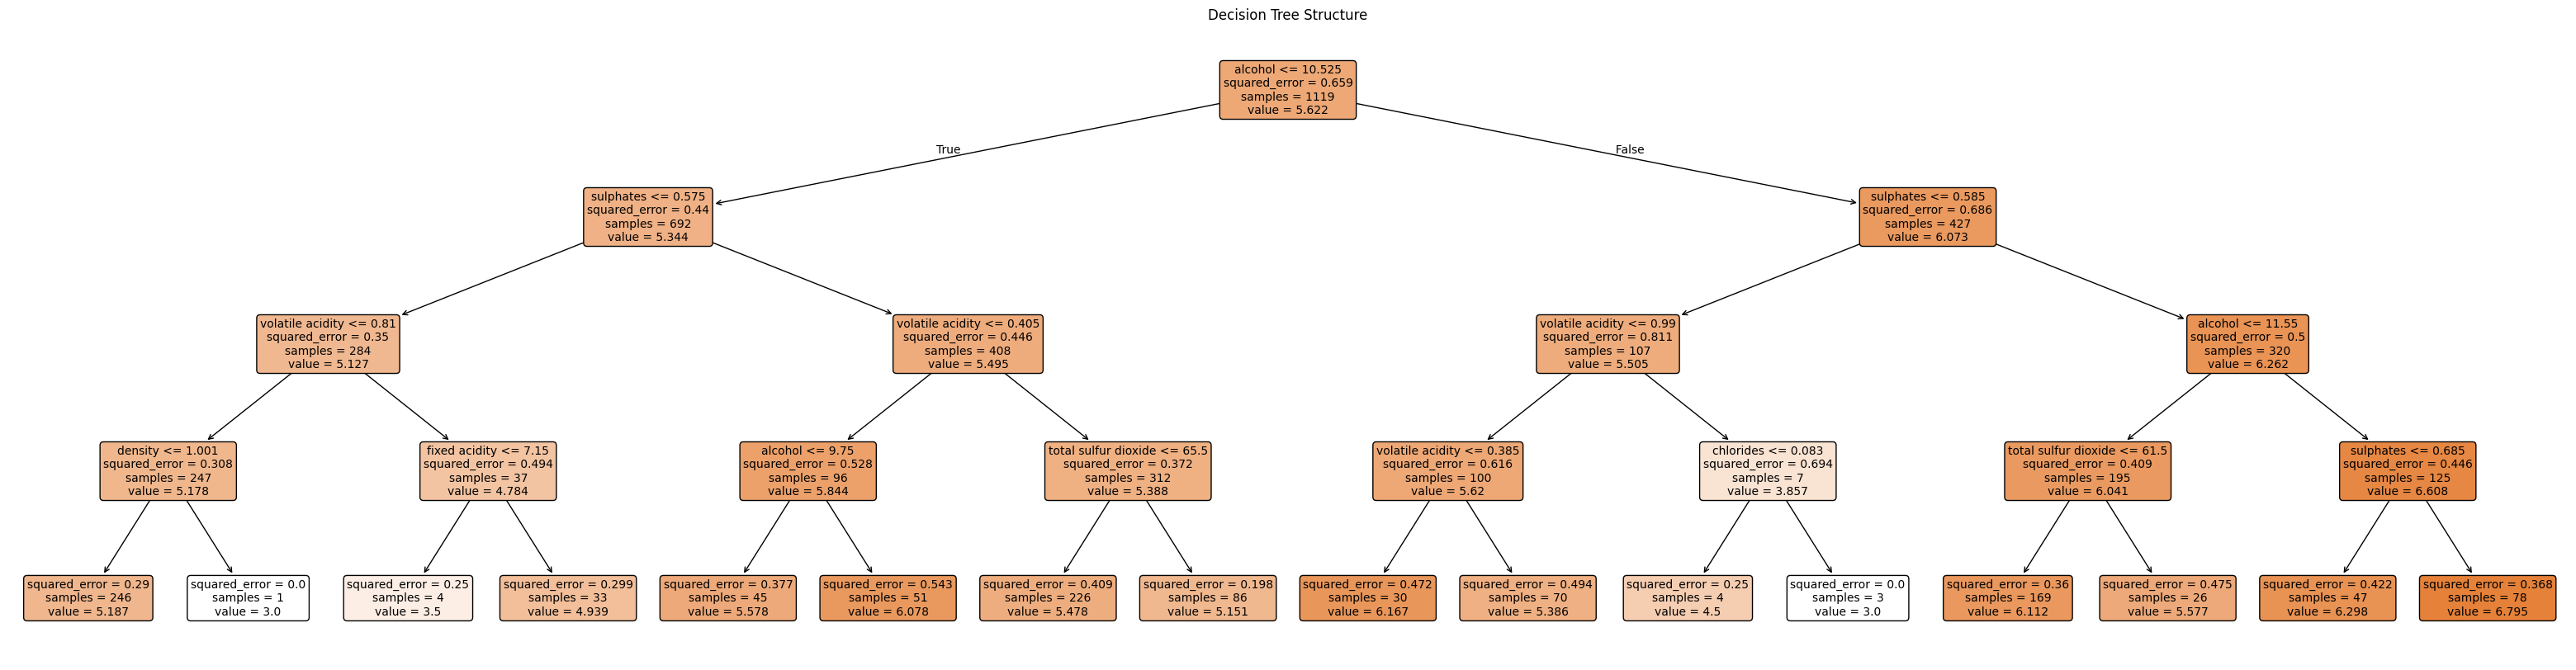

In [83]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 10))
plot_tree(
    regressor,
    feature_names=fields,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()

We've thus created a DecisionTreeRegressor that predicts quality based on the many different features that did not have a linear relationship

In [98]:
results = pd.DataFrame({"predicted": y_pred, "original": y_test})

In [99]:
results

,predicted,original
0,5.477876,6
1,5.186992,5
2,5.477876,6
3,5.186992,5
4,6.112426,6
...,...,...
475,5.477876,7
476,6.112426,8
477,6.112426,6
478,6.297872,7


In [105]:
results["diff"] = results["original"] - results["predicted"]

In [106]:
alt.Chart(results).mark_point().encode(
    x="predicted",
    y="original",
    color="diff"
    
)
    

alt.Chart(...)

In [107]:
results

,predicted,original,diff
0,5.477876,6,0.522124
1,5.186992,5,-0.186992
2,5.477876,6,0.522124
3,5.186992,5,-0.186992
4,6.112426,6,-0.112426
...,...,...,...
475,5.477876,7,1.522124
476,6.112426,8,1.887574
477,6.112426,6,-0.112426
478,6.297872,7,0.702128


In [110]:
results["diff"].describe()

count    480.000000
mean       0.024145
std        0.687396
min       -2.477876
25%       -0.385714
50%       -0.151163
75%        0.522124
max        1.887574
Name: diff, dtype: float64